https://unaids.org.br/wp-content/uploads/2017/04/power-of-antiretroviral-medicines_pt-1.pdf

https://www.boasaude.com.br/artigos-de-saude/3837/-1/linha-do-tempo-da-aids-do-primeiro-caso-aos-dias-atuais.html#:~:text=%C3%89%20lan%C3%A7ado%20o%20medicamento%20Videx,transfus%C3%A3o%20de%20sangue%20em%201983.

https://www3.bcb.gov.br/portalpasbc/Public/Files/Noticia/Dezembro_Vermelho_2019.pdf

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [74]:
df = pd.read_csv('HIV-AIDS.csv',thousands = '.')
df

,Fx. Etária(SINAN),1980,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,< 1 ano,0,2,0,4,6,1,29,60,63,...,280,228,207,192,176,148,147,127,59,7944
1,1-4,0,0,0,3,3,8,21,41,56,...,217,282,260,216,186,203,180,157,68,9940
2,5-9,0,0,0,1,5,6,12,16,25,...,164,123,122,117,95,77,77,76,43,5242
3,10-14,0,1,0,3,6,9,21,27,39,...,192,161,145,112,90,80,76,68,32,3500
4,15-19,0,0,1,6,27,49,127,209,245,...,804,895,983,1033,1025,970,899,794,323,19934
5,20-34,1,10,26,64,259,588,1481,2411,3355,...,16837,16964,17408,16842,16381,15544,15677,15016,6706,422557
6,35-49,0,2,12,42,188,379,820,1291,1807,...,17223,16594,16498,15959,15236,14659,13810,13760,5800,370308
7,50-64,0,2,2,7,32,70,155,241,366,...,5812,5988,6309,6325,6295,6206,6040,6020,2469,110204
8,65-79,0,0,0,1,2,2,25,37,43,...,775,791,940,881,962,967,1019,1061,396,15305
9,80 e mais,0,0,0,1,0,0,2,1,3,...,51,59,62,69,60,70,74,82,27,926


In [97]:
print(df.T[28:29].sum().sum())
print(df.T[30:31].sum().sum())

40882.0
40409.0


In [101]:
#Renomeando a coluna para facilitar as análises
df.rename(columns={'Fx. Etária(SINAN)' : 'fx_idade'}, inplace = True)
df.head(2)

,fx_idade,1980,1982,1983,1984,1985,1986,1987,1988,1989,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,< 1 ano,0,2,0,4,6,1,29,60,63,...,280,228,207,192,176,148,147,127,59,7944
1,1-4,0,0,0,3,3,8,21,41,56,...,217,282,260,216,186,203,180,157,68,9940


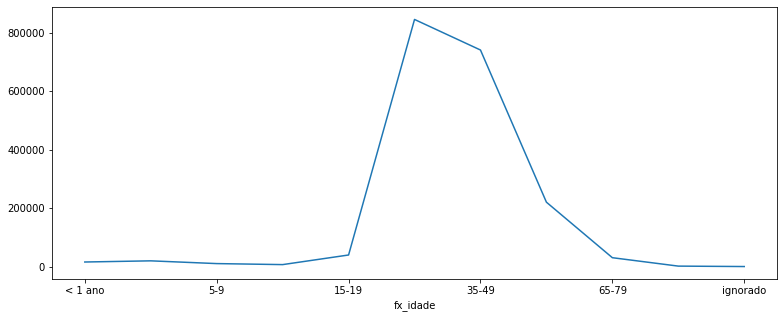

In [110]:
df.set_index('fx_idade').T.sum().plot(figsize=(13,5))

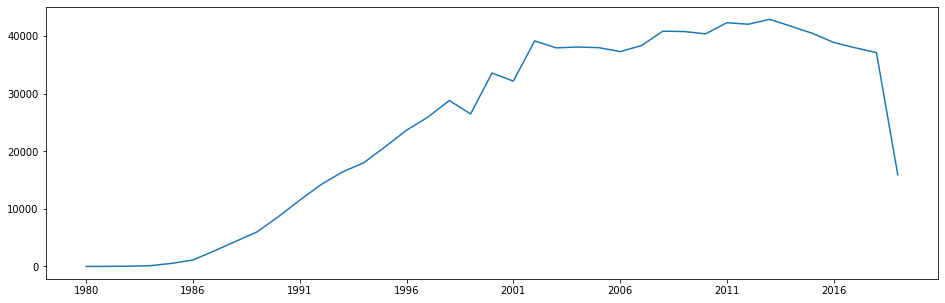

In [134]:
df.drop(['fx_idade', 'Total'], axis = 1).sum().plot(figsize=(16,5))

Tabela 1 - Casos de AIDS notificados no SINAN, declarados no SIM e registrados no SISCEL/SICLOM por ano de diagn󳴩co															
Casos de AIDS	Total	1980-2006	2007	2008	2009	2010	2011	2012	2013	2014	2015	2016	2017	2018	2019
Total	966.058	465.936	38.379	40.882	40.818	40.409	42.355	42.086	42.934	41.746	40.506	38.924	37.999	37.161	15.923
Homens	633.462	309.473	23.040	24.520	24.769	25.109	26.634	26.722	27.849	27.582	27.476	26.661	26.475	26.029	11.123
Mulheres	332.505	156.438	15.336	16.353	16.044	15.297	15.718	15.362	15.079	14.160	13.022	12.255	11.515	11.130	4.796
Menores de 5 anos	17.341	11.975	582	579	552	537	466	480	436	386	336	332	290	265	125
Entre 15 e 24 anos	108.125	52.665	3.359	3.652	3.827	3.886	4.335	4.737	4.952	5.003	5.103	4.879	4.950	4.695	2.082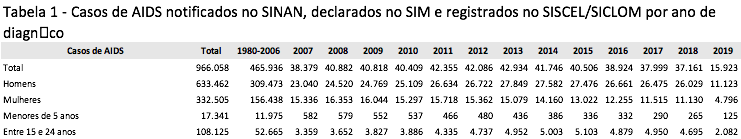

In [140]:
df.drop(['fx_idade', 'Total'], axis = 1).sum().sum()

966058